# Random Forest

In [3]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
moviedata = pd.read_csv('AfterEDA-Cleaning.csv')
moviedata.head(n = 10)

,Unnamed: 0,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
5,5,6,Room,2010s,7,18+,8.1,93,1,Drama,Ireland,English,118
6,6,7,Monty Python and the Holy Grail,1970s,47,7+,8.2,97,1,Adventure,United Kingdom,English,91
7,7,8,Indiana Jones and the Last Crusade,1980s,33,13+,8.2,88,1,Action,United States,English,127
8,8,9,Groundhog Day,1990s,29,7+,8.0,96,1,Comedy,United States,English,101
9,9,10,The King's Speech,2010s,12,18+,8.0,95,1,Biography,United Kingdom,English,118


In [3]:
moviedata.describe()

,Unnamed: 0,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000
mean,2362.500000,2363.500000,15.049937,6.162103,59.498096,1.059670,99.975667
std,1364.423016,1364.423016,13.878385,1.059222,22.423813,0.241325,14.374258
min,0.000000,1.000000,1.000000,1.100000,2.000000,1.000000,60.000000
25%,1181.250000,1182.250000,5.000000,5.500000,45.000000,1.000000,90.000000
50%,2362.500000,2363.500000,11.000000,6.200000,60.000000,1.000000,98.000000
75%,3543.750000,3544.750000,20.000000,6.900000,76.000000,1.000000,109.000000
max,4725.000000,4726.000000,102.000000,9.000000,100.000000,3.000000,140.000000


In [4]:
EDA_numeric = ["IMDb", "Rotten", "Runtime", "Age of Movie"]

In [5]:
moviedata[EDA_numeric].describe()

,IMDb,Rotten,Runtime,Age of Movie
count,4726.000000,4726.000000,4726.000000,4726.000000
mean,6.162103,59.498096,99.975667,15.049937
std,1.059222,22.423813,14.374258,13.878385
min,1.100000,2.000000,60.000000,1.000000
25%,5.500000,45.000000,90.000000,5.000000
50%,6.200000,60.000000,98.000000,11.000000
75%,6.900000,76.000000,109.000000,20.000000
max,9.000000,100.000000,140.000000,102.000000


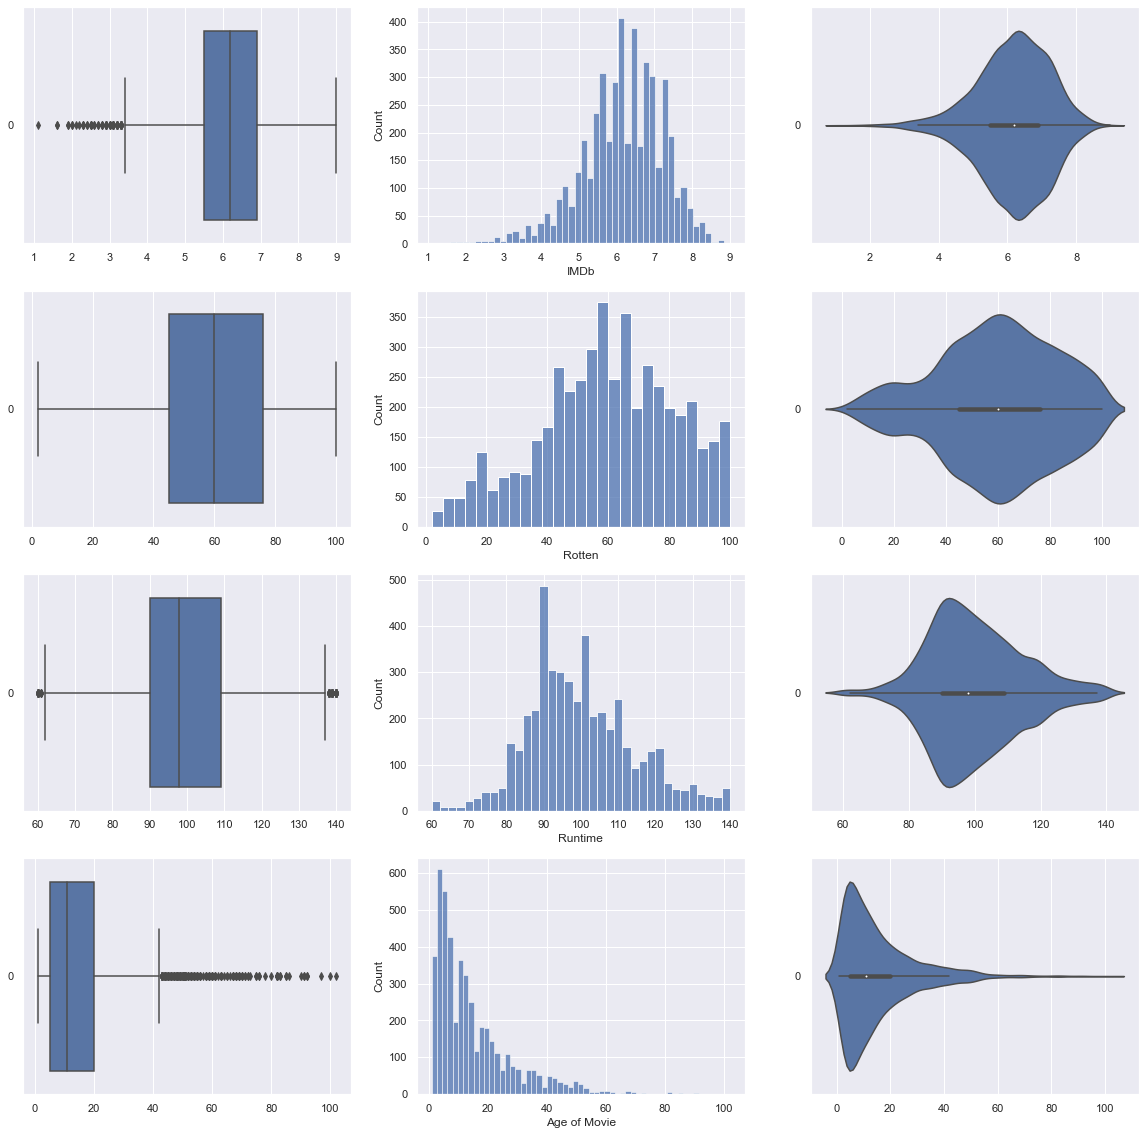

In [6]:
# Draw boxplot, histplot and violinplot of IMDb, Rotten and Runtime
f, axes = plt.subplots(4, 3, figsize=(20, 20))

count = 0
for i in EDA_numeric:
    sb.boxplot(data = moviedata[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = moviedata[i], ax = axes[count,1])
    sb.violinplot(data = moviedata[i], orient = "h", ax = axes[count,2])
    count += 1

## Feature Importance

In [62]:
Feature_df = moviedata[["IMDb", "Rotten", "Runtime", "Age of Movie"]]
a = moviedata["IMDb"]
IMDb_list = []
for i in moviedata["IMDb"]:
    if i >= 7.0:               # Mark good movies with '1' if IMDb >= 7.0
        IMDb_list.append(1) 
    else:                      # Mark bad movies with '0' if IMDb < 7.0
        IMDb_list.append(0)
Feature_df = Feature_df.drop("IMDb", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Feature_df, IMDb_list, test_size = 0.2)

In [63]:
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train) 
accuracy_rf = random_forest.score(X_train, y_train) * 100
print(accuracy_rf, "%")

97.67195767195767 %


In [64]:
# Use K-fold Cross Validation to see how well random forest performs
rf = RandomForestClassifier(n_estimators = 10)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77248677 0.7989418  0.7962963  0.7962963  0.80687831 0.78306878
 0.81746032 0.78571429 0.78306878 0.81481481]
Mean: 0.7955026455026455
Standard Deviation: 0.013900851487216568


In [65]:
importance = pd.DataFrame({"Feature": X_train.columns, "Importance": random_forest.feature_importances_})
importance = importance.sort_values("Importance", ascending = False).set_index("Feature")

In [66]:
importance.head()

,Importance
Feature,
Rotten,0.462041
Runtime,0.294103
Age of Movie,0.243855


Conclusion: Rotten Tomatoes Score is the most important feature. Meanwhile, Availability is the most insignificant one.

### Random Forest Regression

In [68]:
random_forest = RandomForestRegressor() 
X_train, X_test, y_train, y_test = train_test_split(Feature_df, a, test_size = 0.2)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test) 

In [72]:
rf_tuning = RandomForestRegressor(random_state = 20)
param_grid = {
   'n_estimators': [20, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6,7],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator = rf_tuning, param_grid = param_grid, cv = 5)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [69]:
random_forest = RandomForestRegressor(random_state = 20)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Mean Absolute Error (MAE): ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', sklearn.metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error (MAE):  0.6784591060102688
Mean Squared Error (MSE):  0.7850345638956695


In [70]:
random_forest_out_of_bag = RandomForestRegressor(oob_score = True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

0.3339574584814955


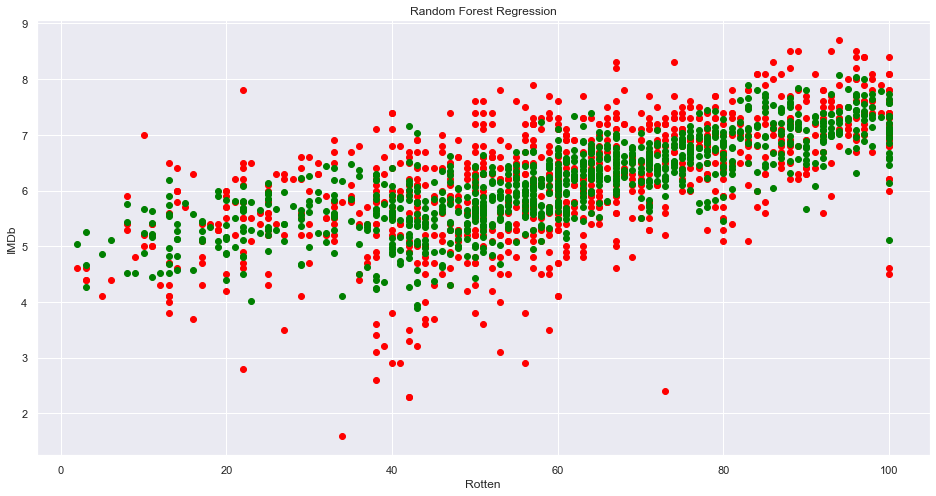

In [75]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Rotten'].values, y_test, color = 'red')
plt.scatter(X_test['Rotten'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Rotten')
plt.ylabel('IMDb')
plt.show()


#### Note: Test values are red and Predicted values are green